# IMPORT LIBRARIES

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# IMPORTING DATA 

In [4]:
data_raw = pd.read_csv('rakamin_dataset/loan_data_2007_2014.csv', index_col=0)

C:\Users\joni\AppData\Local\Temp\ipykernel_8744\3894019361.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('rakamin_dataset/loan_data_2007_2014.csv', index_col=0)


# EXPLORING DATA 

In [5]:
data_raw

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [6]:
data_raw.shape

(466285, 74)

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [8]:
#check data duplikat
print (data_raw.id.nunique())
print (data_raw.member_id.nunique())

466285
466285


In [9]:
column_to_drop = ['id', 'member_id', 'url', 'desc', 'zip_code', 'annual_inc_joint', 'dti_joint', 
                'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 
                'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
                'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'sub_grade'
]

In [10]:
data = data_raw.drop(column_to_drop, axis=1)

In [11]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# DEFINE TARGET VARIABLE / LABELING

In [12]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [13]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['good_bad'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [14]:
data['good_bad'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: good_bad, dtype: float64

In [15]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

In [16]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

C:\Users\joni\AppData\Local\Temp\ipykernel_8744\1742887160.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [18]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [19]:
data.drop('emp_length', axis=1, inplace=True)

In [20]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [22]:
data.drop('term', axis=1, inplace=True)

In [23]:
data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [24]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [25]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [27]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


In [28]:
#merubah data dengan nilai negatif menjadi data dengan nilai terbesar
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [29]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [30]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [31]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [32]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [33]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [34]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [35]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [36]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [37]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [38]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [39]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [40]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [41]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

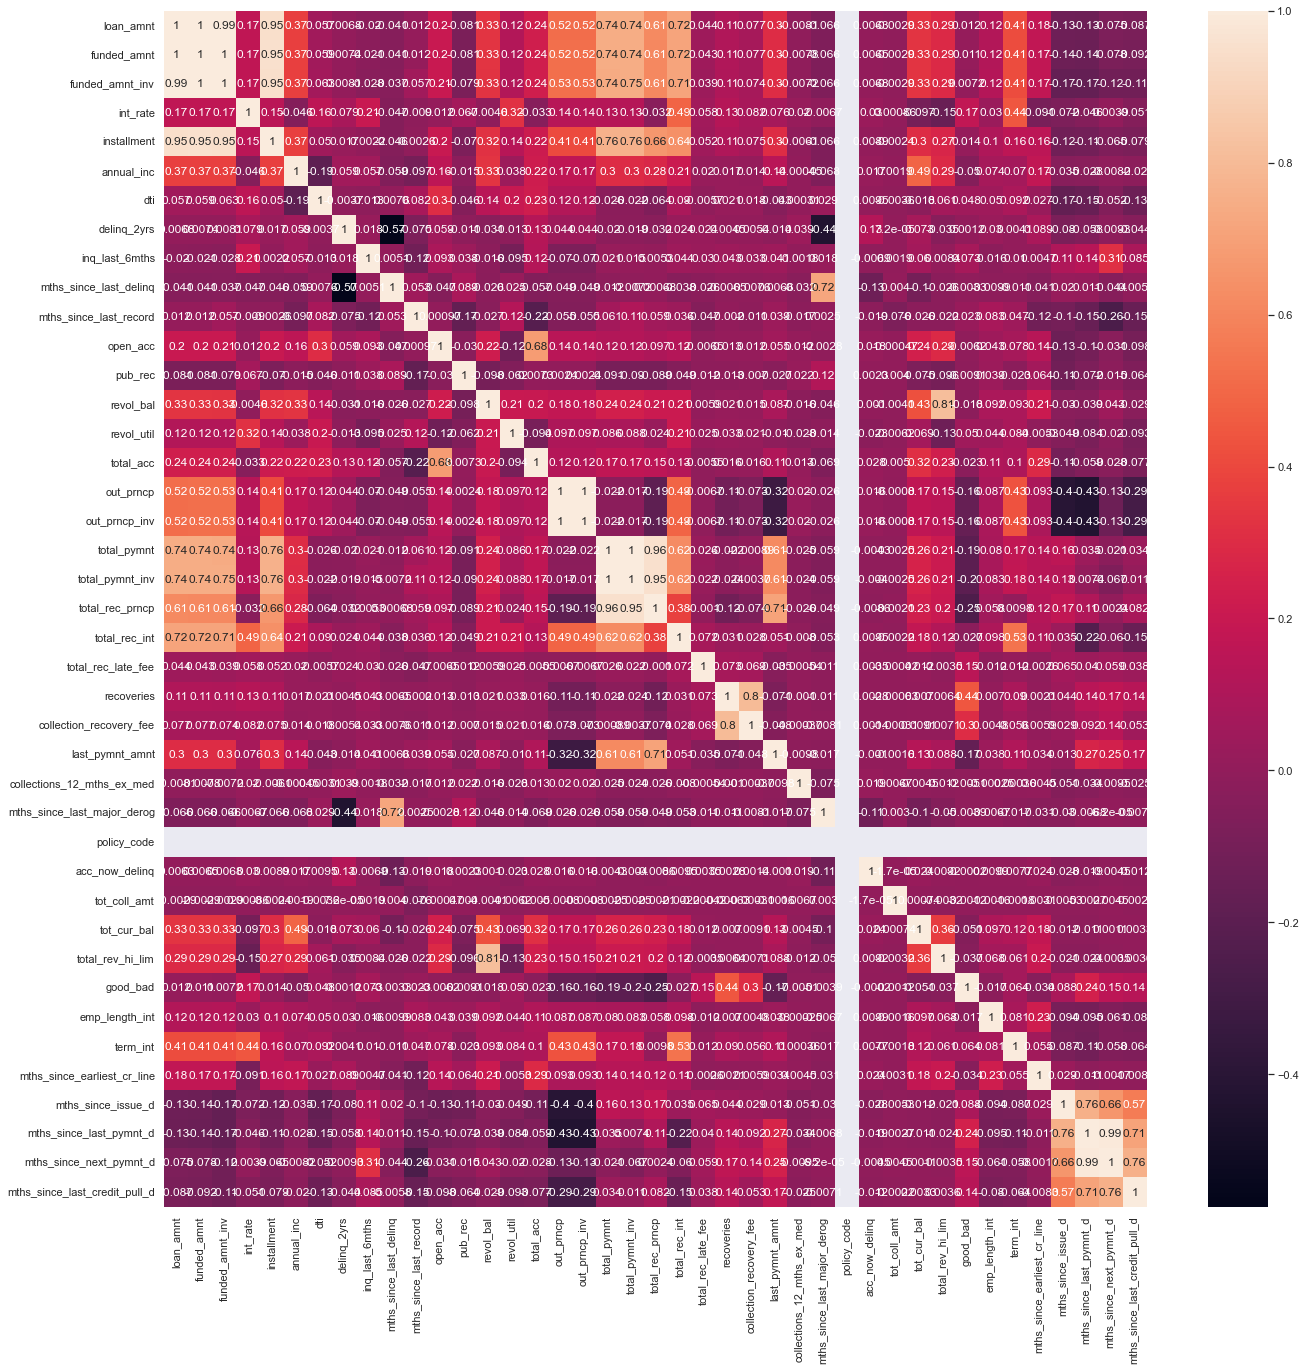

In [42]:
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(),annot=True)

In [43]:
#mencari colum dengan korelasi diatas 0.7
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
column_cor = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\joni\AppData\Local\Temp\ipykernel_8744\44042154.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [44]:
column_cor

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [45]:
data.drop(column_cor, axis=1, inplace=True)

# Check Categorical Features

In [46]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [47]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [48]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
good_bad                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [49]:
data.drop(['policy_code'], axis=1, inplace=True)

In [50]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [51]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

In [52]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

In [53]:
data.drop('mths_since_last_record', axis=1, inplace=True)

In [54]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

In [55]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [56]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [57]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standardization

In [68]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['good_bad']]

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [70]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,...,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,...,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


In [71]:
data_model = pd.concat([onehot, std, data[['good_bad']]], axis=1)

In [72]:
data_model.describe()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,...,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,466285.000000
mean,0.293659,0.268705,0.164895,0.076685,0.028371,0.007124,0.505860,0.000107,0.000390,0.089439,...,1.720436e-13,1.054439e-13,-7.180828e-14,-4.339084e-14,3.089293e-14,-2.180830e-14,1.716246e-13,-4.014038e-16,4.684855e-13,0.109307
std,0.455438,0.443287,0.371086,0.266091,0.166031,0.084105,0.499966,0.010355,0.019753,0.285376,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.312024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.545487e-01,-8.360769e-02,-5.830652e-02,-1.208862e-02,-7.926483e-01,-1.523744e+00,-6.162250e-01,-2.802660e+00,-1.063810e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.545487e-01,-8.360769e-02,-5.830652e-02,-1.208862e-02,-6.886472e-01,-9.912745e-01,-6.162250e-01,-6.749677e-01,-7.151386e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.545487e-01,-8.360769e-02,-5.830652e-02,-1.208862e-02,-4.397760e-01,7.366548e-02,-6.162250e-01,-1.892987e-01,-2.967326e-01,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.545487e-01,-8.360769e-02,-5.830652e-02,-1.208862e-02,4.508336e-01,1.138605e+00,1.622784e+00,4.929505e-01,4.006107e-01,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.054688e+01,1.840251e+02,7.279125e+01,6.788152e+02,5.300042e+01,1.138605e+00,1.622784e+00,3.985142e+00,5.212280e+00,1.000000


# MODELING

In [73]:
from sklearn.model_selection import train_test_split

X = data_model.drop('good_bad', axis=1)
y = data_model['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

# Validation

In [76]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

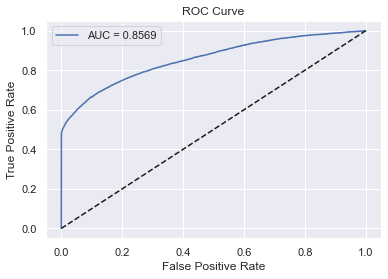

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [78]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [79]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,300127,0,0.049283,1,0,1,0.000011,0.0,0.000012
1,77808,0,0.049286,2,0,2,0.000021,0.0,0.000024
2,254766,0,0.049340,3,0,3,0.000032,0.0,0.000036
3,290214,0,0.049396,4,0,4,0.000043,0.0,0.000048
4,264738,0,0.049468,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5667')

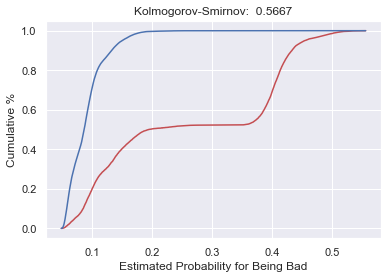

In [80]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)